In [1]:
import pandas as pd

In [32]:
df = pd.read_csv("linear01.csv")
print(list(df.columns)) # names of columns
print(df.shape)         # rows, columns

['x1', 'y']
(21, 2)


<AxesSubplot: xlabel='x1', ylabel='y'>

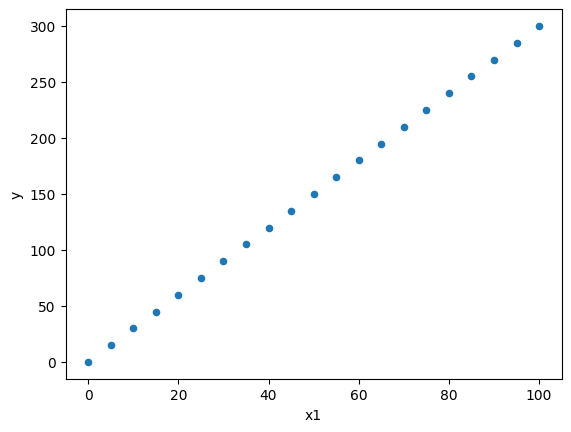

In [33]:
df.plot.scatter(x="x1", y="y")

### Example 1: simple direct linear relationship

* x1 - independent variable (assume it depends on nothing)
* y - dependent variable (depends on x1)
* m - slope (steepness of a straight line) -> a model parameter

$y = mx$

#### Calculate the slope from two data points

$$\frac{y2-y1}{x2-x1}$$

In [34]:
x1 = df.iloc[1]["x1"]
x2 = df.iloc[16]["x1"]
y1 = df.iloc[1]["y"]
y2 = df.iloc[16]["y"]

x1, y1, x2, y2

(5.0, 15.0, 80.0, 240.0)

In [35]:
m = (y2 - y1) / (x2 - x1)
m

3.0

In [36]:
# the slope translates x1 into y. Example: x1 are square meters, y is the flat price in 1000€ 
# we want to know the flat price for a place with 199 square meters

# prediction for y for a new datapoint at x1==199.0:
m * 199

597.0

In [24]:
# pandas can do multiple arithmetic ops at a time
# df["y1"] / df["x"]

### Example 2: Linear relationship with an intercept

In [40]:
df = pd.read_csv("linear02.csv")
print(list(df.columns)) # names of columns
print(df.shape)         # rows, columns

['x1', 'y']
(21, 2)


<AxesSubplot: xlabel='x1', ylabel='y'>

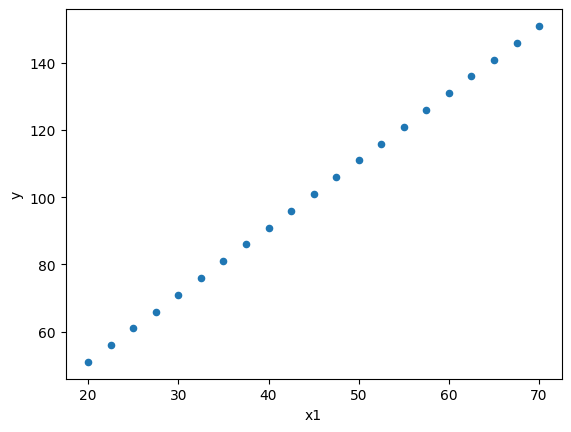

In [41]:
df.plot.scatter(x="x1", y="y")

* a - slope (a model parameter)
* b - intercept (a model parameter)

$y = ax + b$

In [44]:
# get values for two data points
x1 = df.iloc[5]["x1"]
x2 = df.iloc[16]["x1"]
y1 = df.iloc[5]["y"]
y2 = df.iloc[16]["y"]

x1, y1, x2, y2

(32.5, 76.0, 60.0, 131.0)

In [45]:
a = (y2 - y1) / (x2 - x1)
a

2.0

#### find the intercept b:

idea: solve the equation y = ax + b

algebra: b = y - ax

use any data point: b = y1 - a*x1

In [47]:
b = y2 - a * x2
b

11.0

#### Solution:

$$y = 2x + 11$$

logic: base price for a bathroom + price dependent on the size of the flat

### Example 3: Linear Relationship with Noise but no intercept

In [50]:
df = pd.read_csv("linear03.csv")
print(list(df.columns)) # names of columns
print(df.shape)         # rows, columns

['x1', 'y']
(51, 2)


<AxesSubplot: xlabel='x1', ylabel='y'>

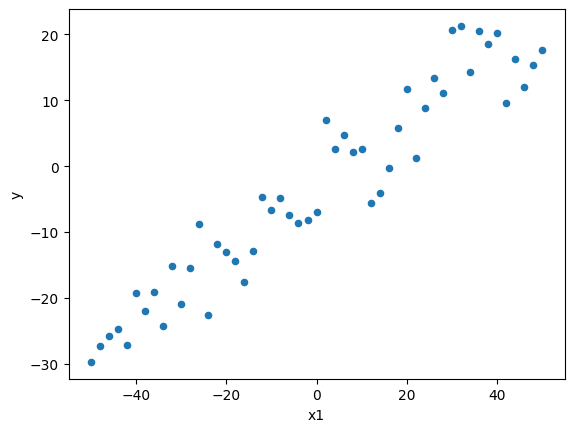

In [51]:
df.plot.scatter(x="x1", y="y")

now the data contains *noise*, a random fluctuation $\epsilon$ (we assume it is normally distributed):

$$y = ax + \epsilon$$

note that the noise is not a model parameter!

Our model is going to be this (using $\hat y$ as an **estimate** of the real y):
$$\hat y = ax$$

#### How good is an estimate?

We use the **mean squared error** as a metric to check how good our model is:

$$\frac{1}{n} \sum_i (\hat y_i - y_i) ^2$$

where 0 means perfect and high number means very bad. Note that the MSE is always positive.

In [72]:
from matplotlib import pyplot as plt
from statistics import mean

In [95]:
a = 1  # our first estimate for the slope
df["ŷ"] = df["x1"] * a  # we calculate the estimate for y (our predictions)

#### Optimize the value for a

In [110]:
# first optimization: try out many different values for a:
results = []

for i in range(100):
    a = i / 100
    df["ŷ"] = df["x1"] * a  # estimate for y
    mse = mean((df["ŷ"] - df["y"]) ** 2)
    results.append((mse, a))
    # print(f"{a:5.2f}    {mse:8.2f}")
    
min(results)

(31.91683219219755, 0.49)

In [96]:
mse = mean((df["ŷ"] - df["y"]) ** 2)  # mean squared error
round(mse, 2)

257.31

In [111]:
df["ŷ"] = df["x1"] * 0.49  # estimate for y using the best a value we could find

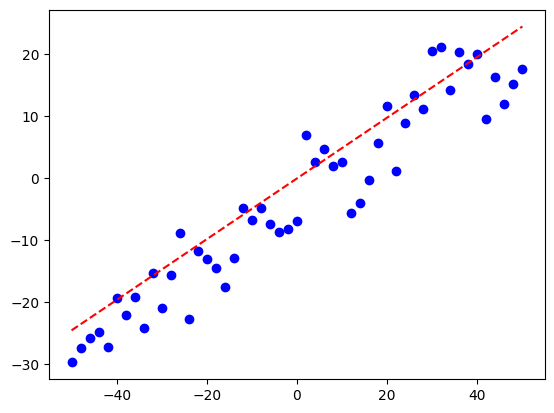

In [112]:
plt.plot(df["x1"], df["y"], "bo")
plt.plot(df["x1"], df["ŷ"], "r--")

### Example 4: Linear Relationship with Noise and with intercept

In [113]:
df = pd.read_csv("linear04.csv")
print(list(df.columns)) # names of columns
print(df.shape)         # rows, columns

['x1', 'y']
(1000, 2)


<AxesSubplot: xlabel='x1', ylabel='y'>

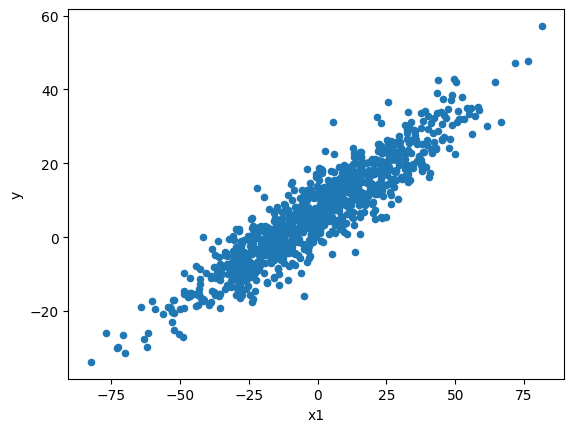

In [114]:
df.plot.scatter(x="x1", y="y")

In [134]:
%%time
# second optimization: try out many different values for a and b:
results = []

for i in range(100):
    for j in range(100):  # nested loop: loop inside a loop
        
        a = i / 100  # a goes from 0 to 1 in steps of 0.01
        b = (j/10) - 5   # b goes from -5 to +5 in steps of 0.1
        
        df["ŷ"] = a * df["x1"] + b
        mse = mean((df["ŷ"] - df["y"]) ** 2)  # does not change
        
        results.append((mse, a, b))
    
min(results)

CPU times: user 17.6 s, sys: 160 ms, total: 17.7 s
Wall time: 17.5 s


(30.046023611867007, 0.49, 4.9)

In [128]:
best_a = 0.49
best_b = 4.9

In [129]:
df["ŷ"] = best_a * df["x1"] + best_b  # estimate for y using the best a value we could find

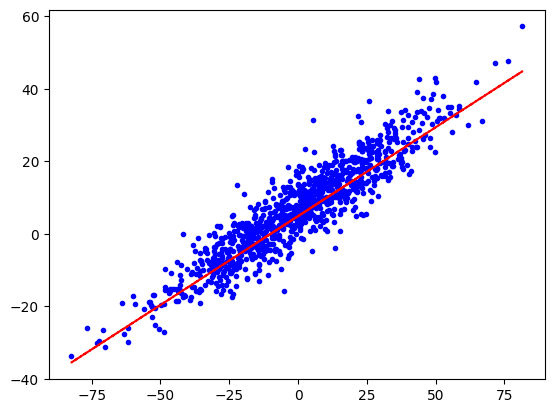

In [130]:
plt.plot(df["x1"], df["y"], "b.")
plt.plot(df["x1"], df["ŷ"], "r--")